In [4]:
import cv2
from functions.blur_detection import blur_detector
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
def plot_images(images, labels):
    plt.figure(figsize=(12, 12))
    for i, img in enumerate(images):
        plt.subplot(int(f'23{i+1}'))
        plt.title(str(labels[i]))
        plt.imshow(img, cmap='gray')
        plt.tick_params(left=False, right=False, 
                        labelleft=False, labelbottom=False, bottom=False)

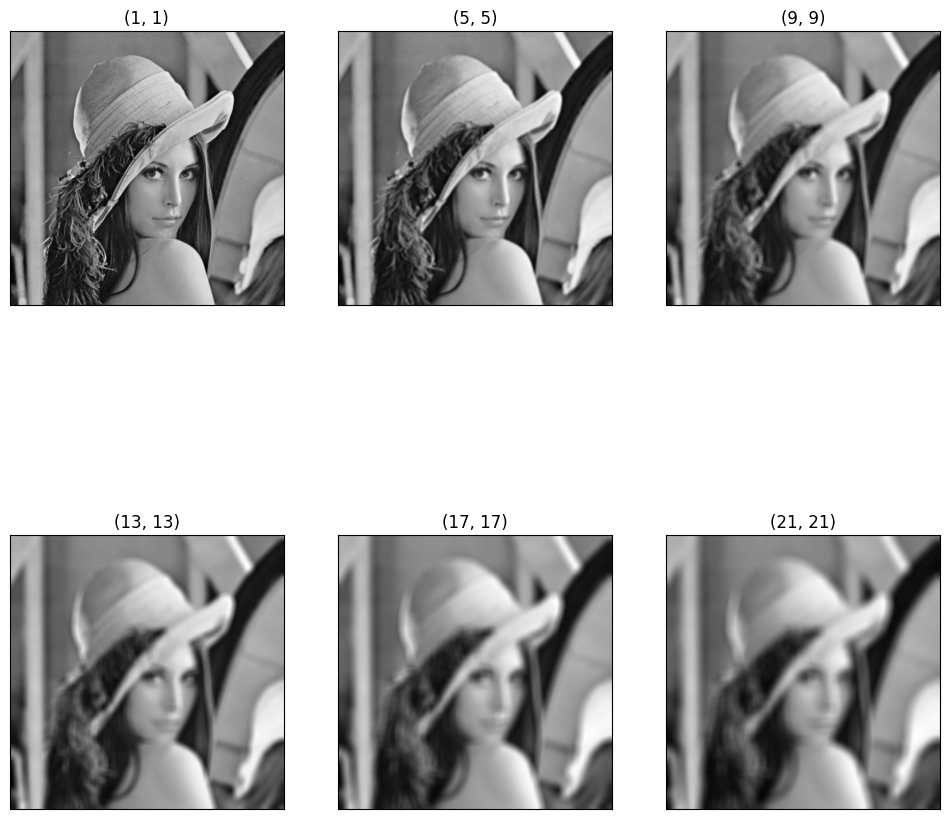

In [6]:
lenna = cv2.imread("../data/images/lenna.png", flags=cv2.IMREAD_GRAYSCALE)

# Filtersizes to use
k_sizes = [(i, i) for i in range(1, 22, 4)]
labels = [str(k) for k in k_sizes]
# Apply mean-filtering with different filtersizes to the images
blur_images = [cv2.blur(lenna, ksize=k) for k in k_sizes]

# Plot images with different blur-levels
plot_images(blur_images, labels)

In [12]:
# threshold of 8 is used as default
res = [blur_detector(img) for img in blur_images]
is_blurry = [r['is_blurry'] for r in res]
score = [r['score'] for r in res]

print(is_blurry)
print(score)

[False, True, True, True, True, True]
[23.00988505868834, 7.387561364385542, -11.048986183735508, -9.933485139410823, -13.761942561430015, -15.838542519933183]


Only the first image is considered non_blurry.
## Lets try with another image:

Since this image is of a smaller resolution, we can use a smaller filter

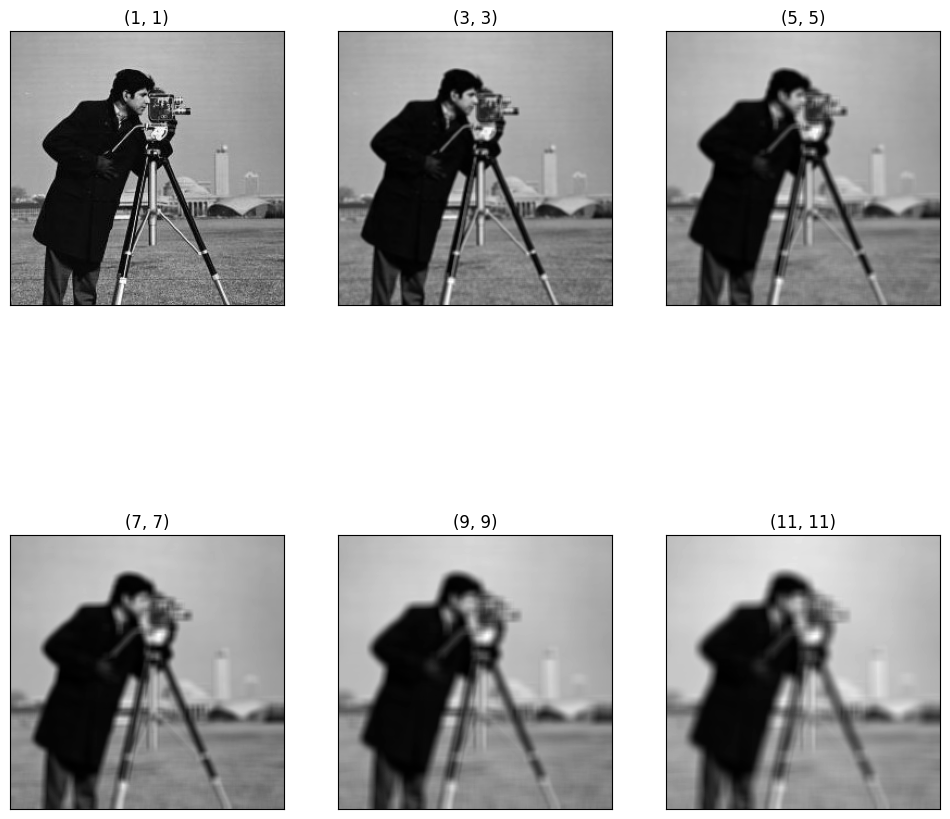

In [14]:
cameraman = cv2.imread(
    "../data/images/cameraman.png", flags=cv2.IMREAD_GRAYSCALE
)

k_sizes = [(i, i) for i in range(1, 12, 2)]
labels = [str(k) for k in k_sizes]
# Apply mean-filtering with different filtersizes to the images
blur_images = [cv2.blur(cameraman, ksize=k) for k in k_sizes]

# Plot images with different blur-levels
plot_images(blur_images, labels)

In [15]:
res = [blur_detector(img) for img in blur_images]
is_blurry = [r['is_blurry'] for r in res]
score = [r['score'] for r in res]

print(is_blurry)
print(score)

[False, True, True, True, True, True]
[24.764356512494835, 7.80890198825674, -8.096865826882583, -6.368806048634052, -12.709138074234938, -13.84683117184745]


Again, only the original sharp image is classified as "non-blurry"